In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats



data_path = "commodities_12_22.csv"
# Read the CSV file into a pandas dataframe
df = pd.read_csv(data_path)

# This is for EDA

In [148]:
# Print the first few rows of the dataframe (optional)
dtypes = df.dtypes
print(f'''{df.head()}

Data Types of each column: \n{dtypes}''')


         Date  Crude Oil  Brent Oil  Natural Gas    Gold  Silver  Copper
0  2022-06-15     119.11     121.35        7.296  1814.8  21.090  4.1777
1  2022-06-14     118.93     121.17        7.189  1813.5  20.954  4.1565
2  2022-06-13     120.93     122.27        8.609  1831.8  21.255  4.2115
3  2022-06-10     120.67     122.01        8.850  1875.5  21.931  4.2945
4  2022-06-09     121.51     123.07        8.963  1852.8  21.817  4.3810

Data Types of each column: 
Date            object
Crude Oil      float64
Brent Oil      float64
Natural Gas    float64
Gold           float64
Silver         float64
Copper         float64
dtype: object


In [149]:
print(df)

            Date  Crude Oil  Brent Oil  Natural Gas    Gold  Silver  Copper
0     2022-06-15     119.11     121.35        7.296  1814.8  21.090  4.1777
1     2022-06-14     118.93     121.17        7.189  1813.5  20.954  4.1565
2     2022-06-13     120.93     122.27        8.609  1831.8  21.255  4.2115
3     2022-06-10     120.67     122.01        8.850  1875.5  21.931  4.2945
4     2022-06-09     121.51     123.07        8.963  1852.8  21.817  4.3810
...          ...        ...        ...          ...     ...     ...     ...
3254  2012-01-29        NaN        NaN          NaN     NaN  33.908     NaN
3255  2012-01-22        NaN        NaN          NaN     NaN  31.793     NaN
3256  2012-01-15        NaN        NaN          NaN     NaN  29.785     NaN
3257  2012-01-08        NaN        NaN          NaN     NaN  28.848     NaN
3258  2012-01-02        NaN        NaN          NaN     NaN  28.160     NaN

[3259 rows x 7 columns]


In [150]:
#Total Rows
totalRows = df.shape[0]

#Counting the # of Nulls
nulls = df.isnull().sum(axis=1)
rowCountWNulls = len(nulls[nulls>0])

#Latest null row
df['Date'] = pd.to_datetime(df['Date'])
#Find the first row with a Null value (Excluding 'Date')

nullMask = df.iloc[:, 1:].isnull().any(axis = 1) #Check for nulls except for Date
latestNullRow = df[nullMask].iloc[0]

print(f'''Total rows: {totalRows}
Number of rows with nulls: {rowCountWNulls}
Null Date: {latestNullRow.iloc[0]}''')

Total rows: 3259
Number of rows with nulls: 603
Null Date: 2022-05-29 00:00:00


In [151]:
dropNA = df.dropna(axis=0)
totalRows = dropNA.shape[0]
#Counting the # of Nulls
nulls = dropNA.isnull().sum(axis=1)
rowCountWNulls = len(nulls[nulls>0])

duplicates = dropNA.duplicated()

print(f'''{dropNA.head()}      
Total rows: {totalRows}
Number of rows with nulls: {rowCountWNulls}
Latest Date: {dropNA['Date'].min()}
Total amount of duplicates: {duplicates.sum()}''')

        Date  Crude Oil  Brent Oil  Natural Gas    Gold  Silver  Copper
0 2022-06-15     119.11     121.35        7.296  1814.8  21.090  4.1777
1 2022-06-14     118.93     121.17        7.189  1813.5  20.954  4.1565
2 2022-06-13     120.93     122.27        8.609  1831.8  21.255  4.2115
3 2022-06-10     120.67     122.01        8.850  1875.5  21.931  4.2945
4 2022-06-09     121.51     123.07        8.963  1852.8  21.817  4.3810      
Total rows: 2656
Number of rows with nulls: 0
Latest Date: 2012-01-03 00:00:00
Total amount of duplicates: 0


# Starting to clean explore plotting the code

In [152]:


#Set the date as the index
dropNA.set_index('Date', inplace = True)


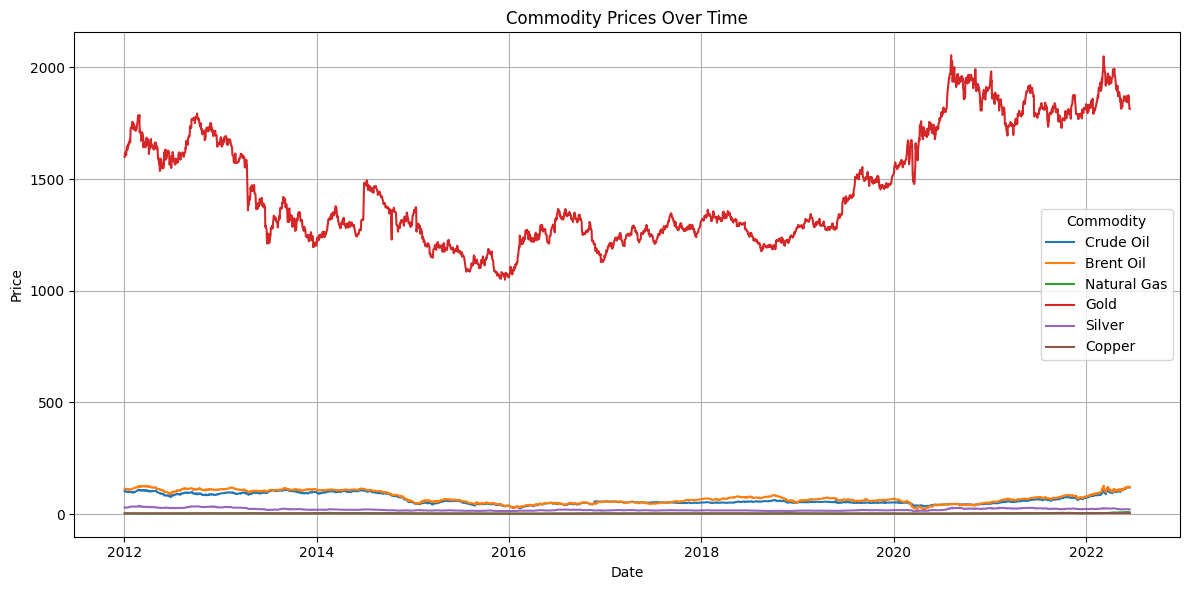

In [153]:
#Create the line plot
plt.figure(figsize=(12,6))
for col in dropNA.columns:
    plt.plot(dropNA.index, dropNA[col], label = col)
plt.title("Commodity Prices Over Time")
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(title = 'Commodity')
plt.grid(True)

plt.tight_layout()
plt.show()

In [154]:
#Gold Table
goldDf = dropNA[['Gold']]
print(goldDF)

              Gold
Date              
2022-06-15  1814.8
2022-06-14  1813.5
2022-06-13  1831.8
2022-06-10  1875.5
2022-06-09  1852.8
...            ...
2012-01-09  1607.5
2012-01-06  1616.1
2012-01-05  1619.4
2012-01-04  1611.9
2012-01-03  1599.7

[2656 rows x 1 columns]


In [155]:
noGoldDf = dropNA.drop("Gold", axis = 1)
print(noGoldDf)

            Crude Oil  Brent Oil  Natural Gas  Silver  Copper
Date                                                         
2022-06-15     119.11     121.35        7.296  21.090  4.1777
2022-06-14     118.93     121.17        7.189  20.954  4.1565
2022-06-13     120.93     122.27        8.609  21.255  4.2115
2022-06-10     120.67     122.01        8.850  21.931  4.2945
2022-06-09     121.51     123.07        8.963  21.817  4.3810
...               ...        ...          ...     ...     ...
2012-01-09     101.31     112.45        3.011  28.749  3.4130
2012-01-06     101.56     113.06        3.062  28.653  3.4310
2012-01-05     101.81     112.74        2.980  29.265  3.4220
2012-01-04     103.22     113.70        3.096  29.063  3.4290
2012-01-03     102.96     112.13        2.993  29.533  3.5250

[2656 rows x 5 columns]


UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

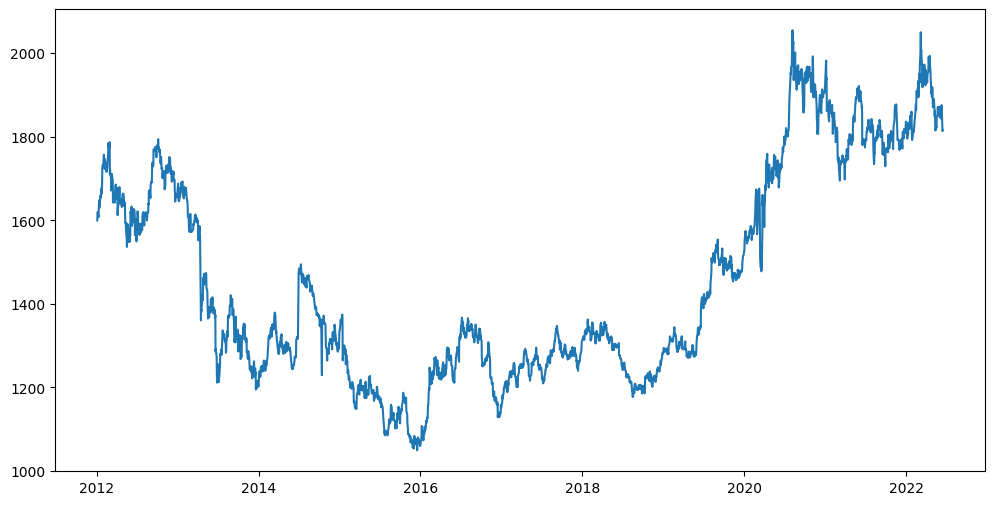

In [156]:


plt.figure(figsize=(12,6))
for col in goldDf.columns:
    plt.plot(goldDf.index, goldDf[col], label = col)

    #Calculate the line of best fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(goldDf.index.to_numpy(), goldDf[col].to_numpy())
    
    # Generate x-values for the fitted line
    x_fit = np.linspace(goldDf.index.min(), goldDf.index.max()*1.1, 100)

    #Calculate y-values
    y_fit = slope * x_fit + intercept

    #Plot the fitted Line
    plt.plot(x_fit, y_fit, color = 'red', label = 'Best Fit')

plt.title("Gold Prices Over Time")
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(title = 'Gold')
plt.grid(True)

plt.tight_layout()
plt.show()


plt.figure(figsize=(12,6))
for col in noGoldDf.columns:
    plt.plot(noGoldDf.index, noGoldDf[col], label = col)
plt.title("Commodity Prices Over Time")
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(title = 'Commodity')
plt.grid(True)

plt.tight_layout()
plt.show()

<Axes: >

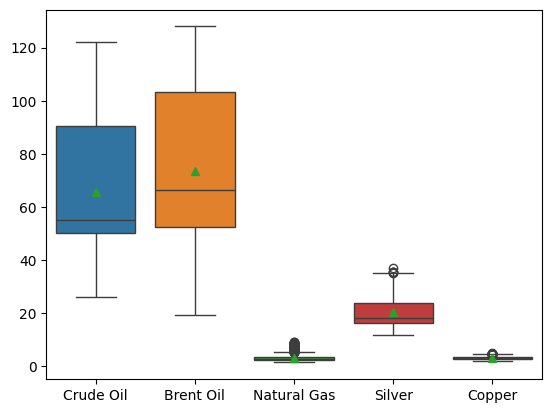

In [ ]:
#boxplot for all the commodities

sns.boxplot(
    data = noGoldDf,
    orient = 'v',
    showmeans = True
)


